<a href="https://colab.research.google.com/github/anesukafesu/water_potability/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Setting the Seaborn figure size for plots
sns.set_theme(rc={'figure.figsize':(10, 8)})



```
# This is formatted as code
```

# Step 1: Reading the data

Using Pandas to read the data from the csv file and get a summary.

In [ ]:
df = pd.read_csv('./water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Step 2: Cleaning the data
Dropping all the empty rows.

In [ ]:
df = df.dropna()
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441375,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587065,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672410,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


# Step 3: Balancing the data
The mean potability is 0.4. This shows that the potability row contains more 0s than 1s. Therefore there are more rows for water that is not potable than those of water that is potable.

In [ ]:
# Do nothing, as prescribed by the coach. And the coach is always right.

# Step 4: Deciding on important features
Deciding on which features are most important to the target(potability) by plotting a correlation matrix.

In [ ]:
columns = list(df.columns)
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
corr = df.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


# Step 4.1: Plotting a heatmap
It seems there is no strong correlation between potability and individual features. There is need to explore data further to see if that is the case.

<Axes: >

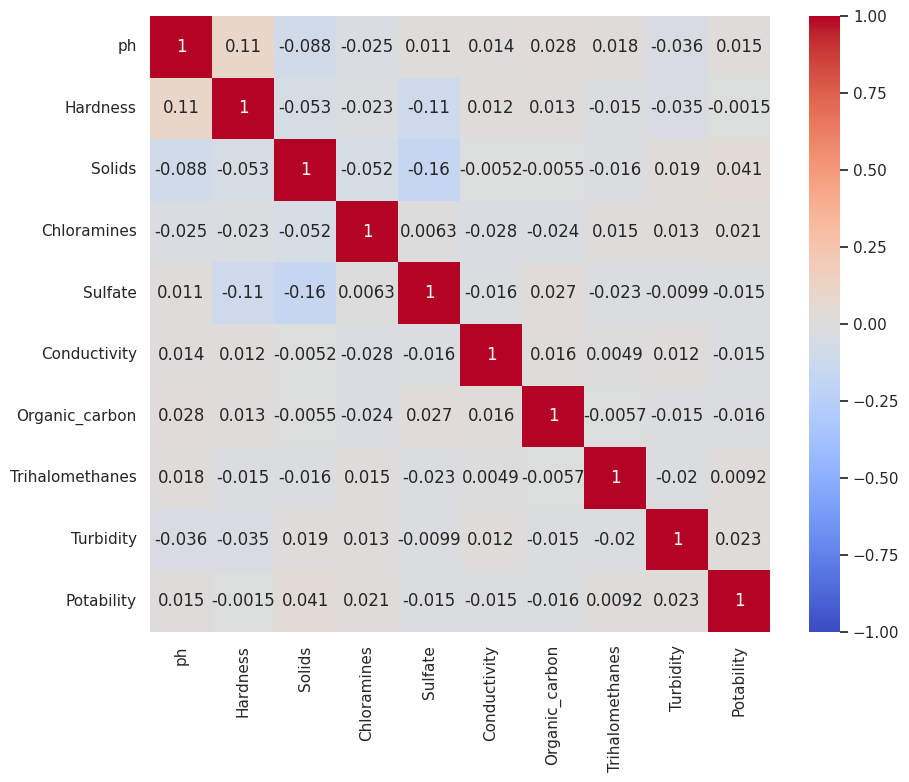

In [ ]:
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# Step 4.2 Drawing scatter plots between different features

Trying to determine if there are obvious trends in the way the data is spread in order to determine the potability of water.

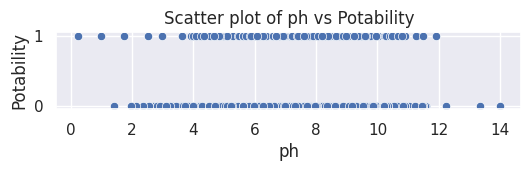

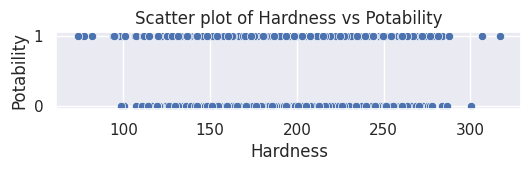

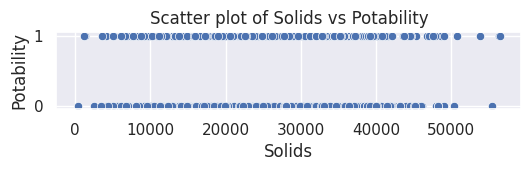

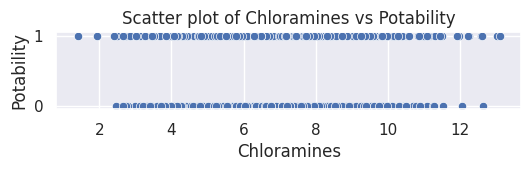

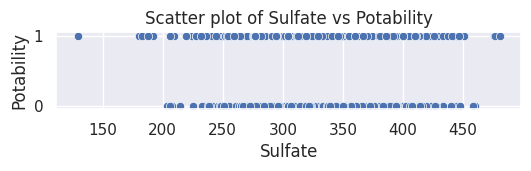

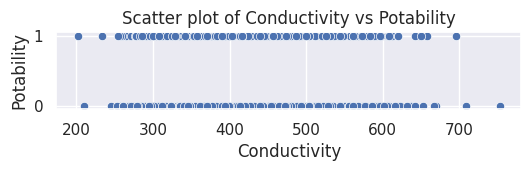

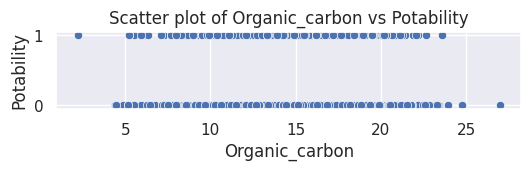

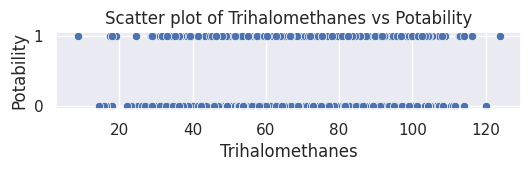

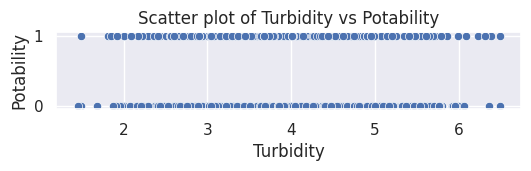

In [ ]:
# Create a list of columns to plot by copying the columns list
# And removing the Potability column
columns_to_plot = columns.copy()
columns_to_plot.remove('Potability')

for column in columns_to_plot:
  plt.figure(figsize=(6, 1))
  sns.scatterplot(x=df[column], y=df['Potability'])
  plt.title(f'Scatter plot of {column} vs Potability')
  plt.xlabel(column)
  plt.ylabel('Potability')
  plt.show()

# Step 4: Conclusion

As shown by the heatmap and the scatterplots that followed, there is no direct correlation between the potability of water and any individual feature. What this suggests is that perhaps the potability of water does not depend on an individual feature but an interplay of several features. For example, water that has high conductivity might be safe, and water with a high ph might also be safe, but water with high conductivity and ph at the same time might not be safe. Therefore there is need to compose superfeatures that combine multiple features. This can be done for us by a multi-layer neural network where the hidden layers combine several features from the previous layer using weights to compose superfeatures that will then be passed to the next layers.

Therefore, rather than selecting features at this stage, we will be using them all to build multi-layer neural networks in the next stage.

# Step 5: Preparing the data for training

To prepare the data for training, we are going to scale the data, split the data into features and target, and then split it further into training and testing data.

In [ ]:
# Features to be used
X_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Y_target = ['Potability']

# Extracting the features
X = df[X_features]
Y = df[Y_target]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the training data from the testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state=42)

# Further split the training set into training (85%) and validation (15%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

# Transposing the data so that it is in the shape (nx, m) where nx is the number of features and m is the number of training examples
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (9, 1366)
Y_train shape: (1, 1366)
X_test shape: (9, 403)
Y_test shape: (1, 403)


# Step 6: Implementing a model without regularisation or optimisation
## Part 1: Defining the model
Add layers to the model:

1.   Add layers to the model:


*   Start by adding a dense layer with 10 units, ReLU activation function, and specify the input dimension to match the number of features in your training data.
*   Add another dense layer with 1 unit and a sigmoid activation function. This layer will output the probability of water potability.


2.   Compile the model:

*   Compile the model using the `adam` optimizer.
*   Specify the loss function as `binary_crossentropy` since this is a binary classification problem.
*   Include `accuracy` as a metric to track during training.

## Part 2: Training the model

1.   Train the model:


*   Use the `fit` method to train the model.
*   Provide the training data (`X_train` and `Y_train`).
*   Set the number of epochs to 100.
*   Specify the batch size as 32.











In [ ]:
# Define the model
model = tf.keras.models.Sequential()
# Use an Input layer to define the input shape
model.add(tf.keras.layers.InputLayer(input_shape=(9,)))
# Add layers to the model
model.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=9))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with basic settings
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train.T, Y_train.T, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5016 - loss: 0.8428
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 0.8166
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 0.7519
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 0.7445
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5243 - loss: 0.7431
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4882 - loss: 0.7493
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5367 - loss: 0.7304
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5557 - loss: 0.7135
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 0.7134
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.7112
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 0.6996
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5725 - lo

In [ ]:
# Calculating accuracy on validation data
Y_activations = model.predict(X_test.T)
Y_pred = np.where(Y_activations > 0.5, 1, 0)

np.mean(Y_pred == Y_test.T)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.6774193548387096

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

X_train shape: (9, 1366)
Y_train shape: (1, 1366)


In [ ]:
# Assuming your data is currently in the shape (features, samples)
X_train = X_train.T
Y_train = Y_train.T

#**Step 7: Adding L1 Regularization to the Model**

To prevent overfitting and improve generalization, we will implement L1 regularization. This method adds a penalty equivalent to the absolute value of the coefficients, which encourages sparsity in the model by shrinking the less important features’ weights toward zero.

# Part 1: Modifying the Model with L1 Regularization

We will add an L1 regularization term to the model layers. This is done by specifying the kernel_regularizer argument when adding the dense layers.

In [ ]:
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [ ]:
# the dropout rate
model.add(Dropout(rate=0.5))  # the dropout rate

In [ ]:

# Define the model with L1 regularization
model_l1 = tf.keras.models.Sequential()
# Use Input layer to define the input shape (using 'shape' instead of 'input_shape')
model_l1.add(tf.keras.layers.InputLayer(shape=(9,)))
# Adding L1 regularization to the first hidden layer
model_l1.add(tf.keras.layers.Dense(units=10, activation='relu',
                                   kernel_regularizer=regularizers.l1(0.01)))
# Adding L1 regularization to the output layer
model_l1.add(tf.keras.layers.Dense(units=1, activation='sigmoid',
                                   kernel_regularizer=regularizers.l1(0.01)))


In [ ]:
# Compile the model with the adam optimizer, binary cross-entropy loss function
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the Model
model_l1.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4052 - loss: 1.0738 - val_accuracy: 0.4270 - val_loss: 1.0316
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4747 - loss: 0.9893 - val_accuracy: 0.4599 - val_loss: 0.9800
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4523 - loss: 0.9757 - val_accuracy: 0.4745 - val_loss: 0.9400
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 0.9244 - val_accuracy: 0.4781 - val_loss: 0.9092
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5091 - loss: 0.9035 - val_accuracy: 0.5182 - val_loss: 0.8823
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5232 - loss: 0.8839 - val_accuracy: 0.5547 - val_loss: 0.8595
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5404 - loss: 0.8633 - val_accuracy: 0.5876 - val_loss: 0.8386
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5619 - loss: 0.8373 - val_accuracy: 0.6168 - v

# PART 2: Regularization with L2 Regularization(Ridge):
Part 2.1 using Adam as the optimizer and early stopping

In [ ]:
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Setting up early stopping monitoring validation loss and a patience of 10
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Initializing the model and setting up dense layers
model_l2 = Sequential()
input_l2 = X_train.shape[1]

input_l2_layer = layers.Input(shape=(input_l2,))
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_l2_layer)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(1, activation='sigmoid')(x)

model_l2 = Model(inputs=input_l2_layer, outputs=x)

In [ ]:
# Model compilation and training
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_l2.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7303 - loss: 0.5882 - val_accuracy: 0.7263 - val_loss: 0.5678
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5971 - val_accuracy: 0.7372 - val_loss: 0.5618
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.5990 - val_accuracy: 0.7409 - val_loss: 0.5606
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5943 - val_accuracy: 0.7737 - val_loss: 0.5750
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7446 - loss: 0.5710 - val_accuracy: 0.7591 - val_loss: 0.5711
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7207 - loss: 0.6130 - val_accuracy: 0.7409 - val_loss: 0.5620
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7506 - loss: 0.5818 - val_accuracy: 0.7299 - val_loss: 0.5699
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7322 - loss: 0.5760 - val_accuracy: 0.748